In [1]:
include("src/LiftAlgorithm.jl")
include("src/EchoVisualization.jl")
include("src/LiftVisualization.jl")

_lift_edges_visualization! (generic function with 1 method)

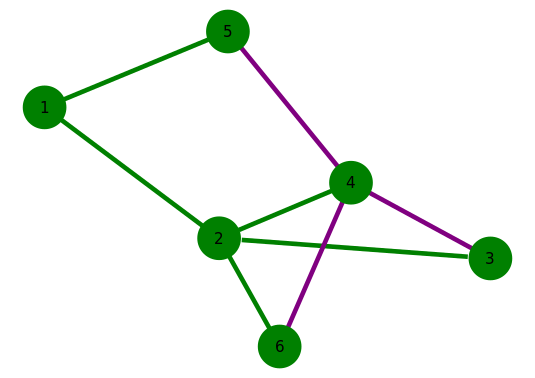

In [2]:
number_of_nodes = 6
g = create_scale_free_topology(number_of_nodes)
cb(content::Letter{Int64,LiftContent}) = LiftContent()
initiator = 1
echo_alg = EchoAlgorithm{Int64}(g, initiator)
init_echo_algorithm!(echo_alg, LiftContent())
fgp = FixedGraphPlot{Int64}(g)
while !has_terminated(echo_alg)
    echo_algorithm_step!(echo_alg, cb)
end
echo_visualization!(fgp, echo_alg)
gc = graph_context(fgp)

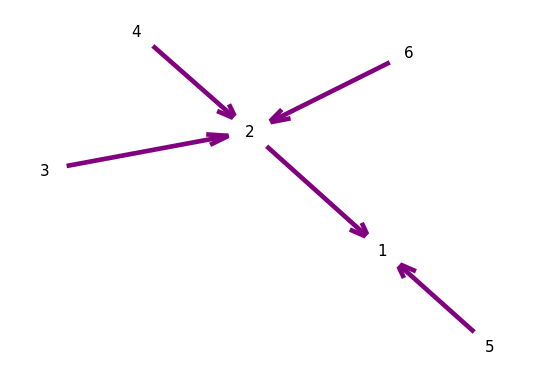

In [3]:
using Graphs:tree
t = tree(echo_alg.activation_edges)
t = SimpleDiGraphFromIterator(reverse(e) for e in edges(t))
ftp = FixedGraphPlot{Int64}(t)
gc = graph_context(ftp)

In [4]:
inquirer =  Set{Int64}(4:6)
lift_alg = LiftAlgorithm{Int64}(t, inquirer)

LiftAlgorithm{Int64}(Network{Int64}({6, 5} directed simple Int64 graph, Queue{Letter}(Deque [Letter[]])), Set([5, 4, 6]), Token{Int64}(1), [0, 1, 2, 2, 1, 2], Set{Int64}[Set(), Set(), Set(), Set(), Set(), Set()], LiftContent())

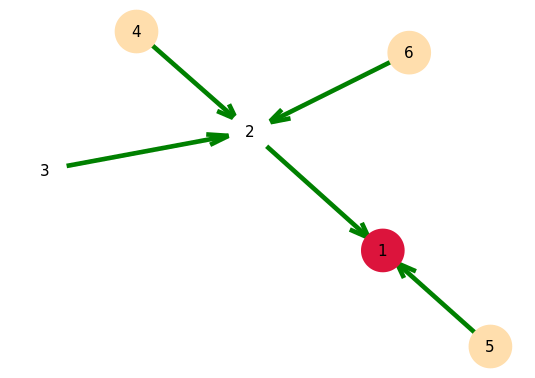

In [5]:
ftp = lift_visualization!(ftp, lift_alg)
gc = graph_context(ftp)

In [6]:
init_lift_algorithm!(lift_alg)
lift_alg.nw.messages

Queue{Letter}(Deque [Letter[Letter{Int64, LiftContent}(Edge 5 => 1, request, LiftContent()), Letter{Int64, LiftContent}(Edge 4 => 2, request, LiftContent()), Letter{Int64, LiftContent}(Edge 6 => 2, request, LiftContent())]])

Network{Int64}({6, 5} directed simple Int64 graph, Queue{Letter}(Deque [Letter[Letter{Int64, LiftContent}(Edge 4 => 2, request, LiftContent()), Letter{Int64, LiftContent}(Edge 6 => 2, request, LiftContent()), Letter{Int64, LiftContent}(Edge 1 => 5, token, LiftContent())]]))

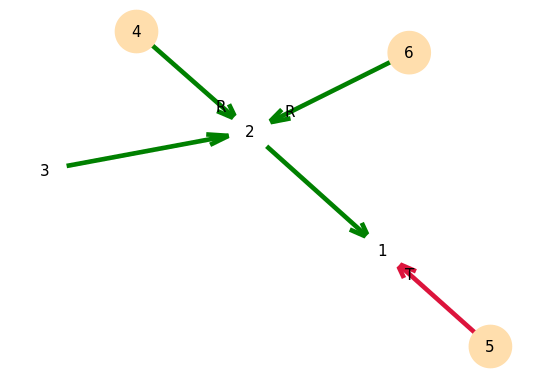

In [7]:
lift_algorithm_step!(lift_alg)
lift_visualization!(ftp, lift_alg)
print(lift_alg.nw)
gc = graph_context(ftp)

In [8]:
anim = Animation()
frame(anim, gc)
i = 0
while !has_terminated(lift_alg)
    i += 1
    lift_algorithm_step!(lift_alg)
    reset_edgeindices!(ftp)
    lift_visualization!(ftp, lift_alg)
    gc = graph_context(ftp)
    frame(anim, gc)
end
"$i steps"

"11 steps"

┌ Info: Saved animation to 
│   fn = /home/tom/MSC_Rostock/dist-systems/networks/lift_test.gif
└ @ Plots /home/tom/.julia/packages/Plots/5kcBO/src/animation.jl:114


Plots.AnimatedGif("/home/tom/MSC_Rostock/dist-systems/networks/lift_test.gif")
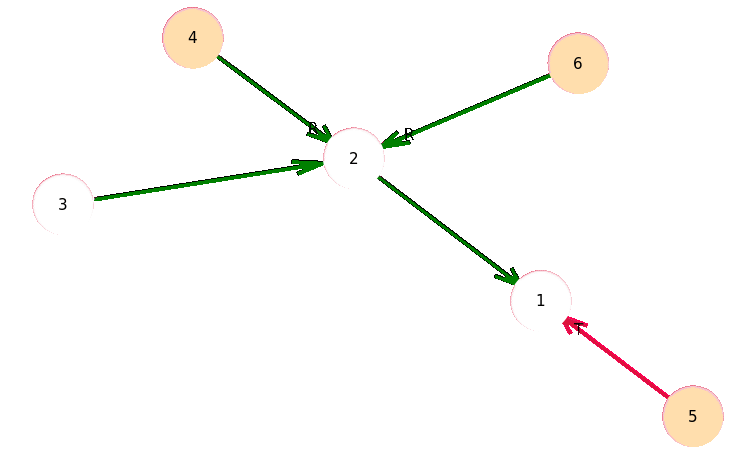

In [9]:
gif(anim, "lift_test.gif", fps = 1)